Я решил, что лучше переписать этот блокнот, оставив только то, что нужно сделать в домашней работе

In [1]:
from PIL import Image
import numpy as np

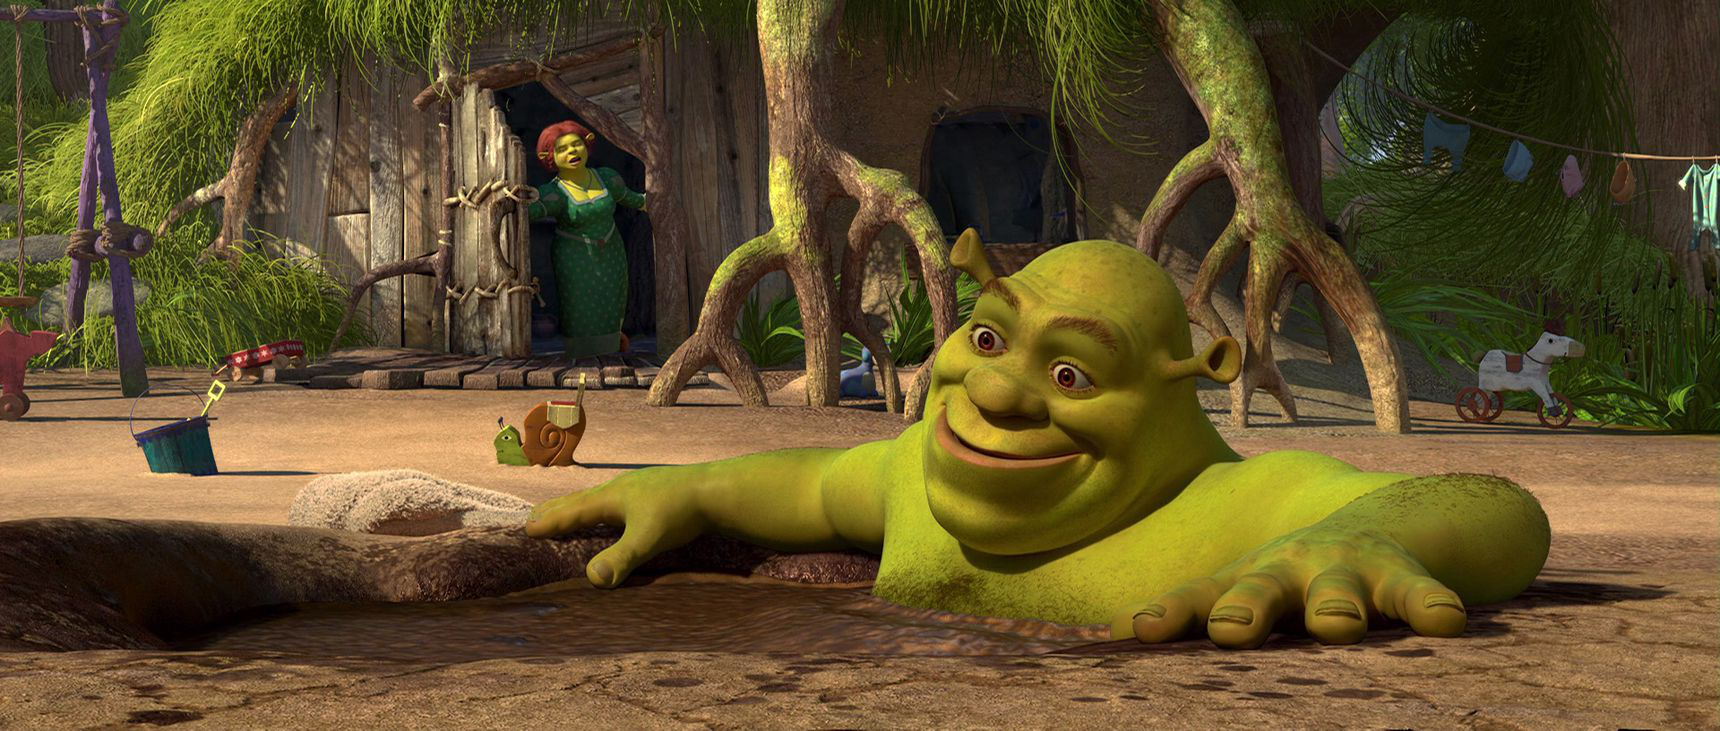

In [2]:
img = Image.open('shrek.jpg')#.resize(())
img

Переводим изображение в массив, разбиваем на каналы

In [3]:
x = np.array(img, dtype=np.float32)

R, G, B = x[:,:,0], x[:,:,1], x[:,:,2]

Вот это несложный цикл варьирует количество сингулярных чисел, используемых для хранения изображения.

In [4]:
Ur, Sr, Vr = np.linalg.svd(R, full_matrices=False) # SVD разложения для каждого канала
Ug, Sg, Vg = np.linalg.svd(G, full_matrices=False)
Ub, Sb, Vb = np.linalg.svd(B, full_matrices=False)
for r in [731, 500, 200, 100, 50, 25, 10, 5, 1]:
    Yr = Ur[:, :r].dot(np.diag(Sr[:r])).dot(Vr[:r, :])
    Yr[Yr > 255] = 255  # клиппирование
    Yr[Yr < 0] = 0
    Yg = Ug[:, :r].dot(np.diag(Sg[:r])).dot(Vg[:r, :])
    Yg[Yg > 255] = 255
    Yg[Yg < 0] = 0
    Yb = Ub[:, :r].dot(np.diag(Sb[:r])).dot(Vb[:r, :])
    Yb[Yb > 255] = 255
    Yb[Yb < 0] = 0
    Y = np.concatenate((Yr[:,:, np.newaxis], Yg[:,:, np.newaxis], Yb[:,:, np.newaxis]), axis=2)
    Image.fromarray(np.asarray(Y, dtype=np.uint8)).save(f'{r} сингулярных чисел.png')

Из разных изображений я собрал гифку, чтобы было проще показать их. Также они есть в корневой папке, но гифка куда интерактивнее

![Шрек](images/coolgif.gif "Шрек")

Также можно поэкспериментировать со сжатием отдельных каналов. Это может дать интересный результат.

In [5]:
r = 9
Yr = Ur.dot(np.diag(Sr)).dot(Vr)
Yrr = Ur[:, :r].dot(np.diag(Sr[:r])).dot(Vr[:r, :])
Yb = Ub.dot(np.diag(Sb)).dot(Vb)
Ybr = Ub[:, :r].dot(np.diag(Sb[:r])).dot(Vb[:r, :])
Yg = Ug.dot(np.diag(Sg)).dot(Vg)
Ygr = Ug[:, :r].dot(np.diag(Sg[:r])).dot(Vg[:r, :])

Yrr[Yrr > 255] = 255
Yrr[Yrr < 0] = 0
Ygr[Ygr > 255] = 255
Ygr[Ygr < 0] = 0
Ybr[Ybr > 255] = 255
Ybr[Ybr < 0] = 0

Y = np.concatenate((Yr[:,:, np.newaxis], Yg[:,:, np.newaxis], Ybr[:,:, np.newaxis]), axis=2)
Image.fromarray(np.asarray(Y, dtype=np.uint8)).save(f'{r}_сингулярных_чисел_в_синем.png')
Y = np.concatenate((Yr[:,:, np.newaxis], Ygr[:,:, np.newaxis], Yb[:,:, np.newaxis]), axis=2)
Image.fromarray(np.asarray(Y, dtype=np.uint8)).save(f'{r}_сингулярных_чисел_в_зелёном.png')
Y = np.concatenate((Yrr[:,:, np.newaxis], Yg[:,:, np.newaxis], Yb[:,:, np.newaxis]), axis=2)
Image.fromarray(np.asarray(Y, dtype=np.uint8)).save(f'{r}_сингулярных_чисел_в_красном.png')
Y = np.concatenate((Yrr[:,:, np.newaxis], Yg[:,:, np.newaxis], Ybr[:,:, np.newaxis]), axis=2)
Image.fromarray(np.asarray(Y, dtype=np.uint8)).save(f'{r}_сингулярных_чисел_в_красном_и_синем.png')

Оставим 9 сингулярных числел в каждом канале по очереди:

Столбец 1             |  Столбец 2
-------------------------|-------------------------|
Оригинал             |  Сжимаем красный
![alt-text-1](images/shrek.jpg "title-1")   | ![alt-text-2](images/9_сингулярных_чисел_в_красном.png "123")
Сжимаем синий             |  Сжимаем зелёный
![alt-text-1](images/9_сингулярных_чисел_в_синем.png "title-1")   |  ![alt-text-2](images/9_сингулярных_чисел_в_зелёном.png "123")

На картинке больше зелёных пикселей – видимо, поэтому сжатие зелёного канала сильнее влияет на общее качество

А если мы сожмём только красный и синий, чёткость краёв сохранится, но цвета перемешаются:

![](images/9_сингулярных_чисел_в_красном_и_синем.png)

Примерно такой же эффект получится, если мы оставим в синем только одно сингулярное число, а остальные каналы трогать не будем:

![](images/1_в_синем.png)

В итоге получается достаточно интересное "свечение" краёв и переменивание цвета. Возможно, это можно использовать в каких-нибудь модных analog damage фильтрах для фото, если отрегулировать масштабы сжатия.

А ещё SVD-разложение оказалось неплохим способом добавить на фото "аналоговые" помехи (опять же, для творческой обработки):

![Шрек](images/coolgif2.gif "Шрек")

### Выводы:
- SVD разложение – хороший способ сжать фото, почти не теряя качество. Например, между изображениями с исходными 731 сингулярными числами и 500 числами разница практически незаметна.
- Мы можем работать с отдельными каналами для достижения разных интересных эффектов.